In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics 
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv("C:/Users/spandan/Downloads/graduate-admissions/Admission_Predict_Ver1.1.csv")


In [ ]:
train.shape

In [26]:
test=pd.DataFrame(np.array([340,118,4,4,4,9.8,1]))
test=test.transpose()
test

,0,1,2,3,4,5,6
0,340.0,118.0,4.0,4.0,4.0,9.8,1.0


In [36]:
train.corr(method='pearson')

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [37]:
train["COA>0.82"] = train["Chance"]>0.82 #0.82 is considered since it represents the 75th percentile value of Chance of Admission. 

In [38]:
train["COA>0.82"] = train["COA>0.82"].astype(int)

In [41]:
train_x = train.iloc[:, 0:7]
train_y = train.iloc[:, -1]
training, val, pred, val_y = train_test_split(train_x, train_y, test_size = 0.2, random_state = 2000) 
train.describe()

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance,COA>0.82
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,0.248000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,0.432284
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,0.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,1.000000


In [45]:
val_y.head()

187    1
318    0
387    0
236    1
342    0
Name: COA>0.82, dtype: int32

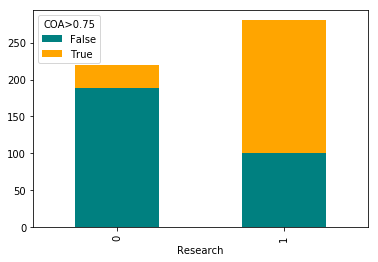

In [7]:
temp = pd.crosstab(train['Research'],train['COA>0.75'])
temp.plot(kind = 'bar', stacked = True, color = ['teal', 'orange'], grid = False)

C:\Users\spandan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


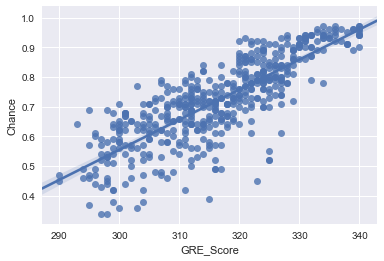

In [8]:
sns.set(color_codes=True)
Scatter = sns.regplot(x="GRE_Score", y="Chance", data=train)

In [9]:
tu = train.columns
x = tu[0:6]
print(x)

Index(['GRE_Score', 'TOEFL_Score', 'University Rating', 'SOP', 'LOR ', 'CGPA'], dtype='object')


C:\Users\spandan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


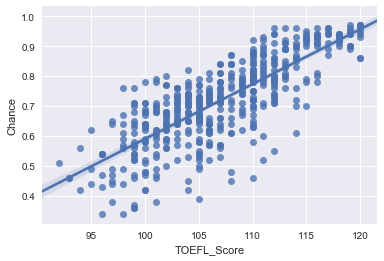

In [10]:
import seaborn as sns; sns.set(color_codes=True)
Scatter = sns.regplot(x="TOEFL_Score", y="Chance", data=train)

C:\Users\spandan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


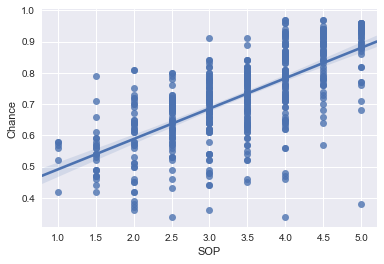

In [11]:
import seaborn as sns; sns.set(color_codes=True)
Scatter = sns.regplot(x="SOP", y="Chance", data=train)

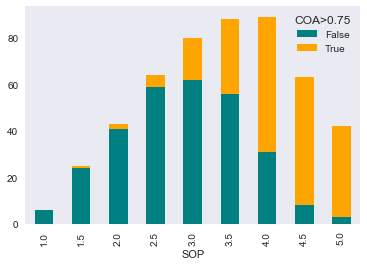

In [12]:
temp = pd.crosstab(train['SOP'],train['COA>0.75'])
temp.plot(kind = 'bar', stacked = True, color = ['teal', 'orange'], grid = False)

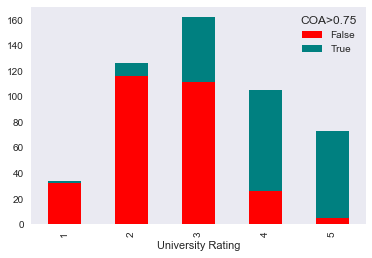

In [13]:
temp = pd.crosstab(train['University Rating'],train['COA>0.75'])
temp.plot(kind = 'bar', stacked = True, color = ['red', 'teal'], grid = False)

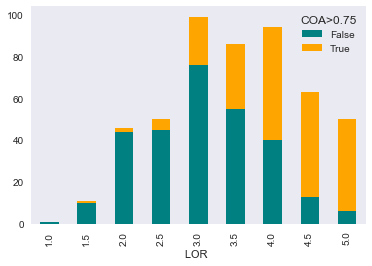

In [14]:
temp = pd.crosstab(train['LOR '],train['COA>0.75'])
temp.plot(kind = 'bar', stacked = True, color = ['teal', 'orange'], grid = False)

In [15]:
bucket = np.linspace(6.5,10,6)
train["CGPA_bins"] = pd.cut(train["CGPA"],bucket)

In [16]:
train.head()

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance,COA>0.75,CGPA_bins
0,337,118,4,4.5,4.5,9.65,1,0.92,True,"(9.3, 10.0]"
1,324,107,4,4.0,4.5,8.87,1,0.76,True,"(8.6, 9.3]"
2,316,104,3,3.0,3.5,8.00,1,0.72,False,"(7.9, 8.6]"
3,322,110,3,3.5,2.5,8.67,1,0.80,True,"(8.6, 9.3]"
4,314,103,2,2.0,3.0,8.21,0,0.65,False,"(7.9, 8.6]"


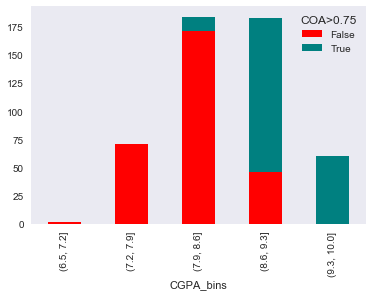

In [17]:
temp = pd.crosstab(train['CGPA_bins'],train['COA>0.75'])
temp.plot(kind = 'bar', stacked = True, color = ['red', 'teal'], grid = False)

C:\Users\spandan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\spandan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\spandan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


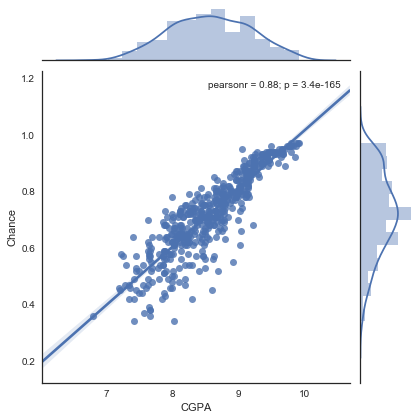

In [18]:
with sns.axes_style('white'):
    sns.jointplot("CGPA", "Chance", train, kind='reg')

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state = 2018, solver='liblinear')
classifier.fit(training, pred)
predictions = classifier.predict(val)
print((predictions))
# prediction = pd.DataFrame(predictions, columns = ['score']).to_csv("C:/Users/spandan/Desktop/Aliens_Dataset_v1/Aliens_Dataset_v1/submission7.csv", index = False)
# err = abs(predictions - val_y)
# print(round(np.mean(err), 2), "degrees")
# mean_p = 100*(err/val_y)
# acc = 100 - np.mean(mean_p)
# print("Accuracy: ", round(acc, 2), "%")
acc = accuracy_score(val_y, predictions, normalize=False)
print("Accuracy: ", acc,"%")

[1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0
 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
Accuracy:  92 %


In [53]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear', gamma='auto')  
svclassifier.fit(training, pred) 
predictions = svclassifier.predict(val)
print((predictions))
acc = accuracy_score(val_y, predictions, normalize=False)
print("Accuracy: ", acc,"%")

[1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
Accuracy:  93 %


In [54]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
model = RandomForestClassifier(random_state = 2018, oob_score = True)
model.fit(training, pred)
predictions = model.predict(val)
print((predictions))
# prediction = pd.DataFrame(predictions, columns = ['score']).to_csv("C:/Users/spandan/Desktop/Aliens_Dataset_v1/Aliens_Dataset_v1/submission10.csv", index = False)
# err = abs(predictions - val_y)
# print(round(np.mean(err), 2), "degrees")
# mean_p = 100*(err/val_y)
# acc = 100 - np.mean(mean_p)
# print("Accuracy: ", round(acc, 2), "%")
acc = accuracy_score(val_y, predictions, normalize=False)
print("Accuracy: ", acc,"%")

C:\Users\spandan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
Accuracy:  92 %


C:\Users\spandan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\spandan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [59]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(training, pred)

# predicting the test set result
predictions = classifier.predict(val)
# prediction = pd.DataFrame(predictions, columns = ['score']).to_csv("C:/Users/spandan/Desktop/Aliens_Dataset_v1/Aliens_Dataset_v1/submission9.csv", index = False)
print(predictions)
acc = accuracy_score(val_y, predictions, normalize=False)
print("Accuracy: ", acc,"%")

[1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
Accuracy:  89 %


In [74]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(loss = "deviance", learning_rate = 0.02, n_estimators = 2000)
classifier.fit(training, pred)

# predicting the test set result
predictions = classifier.predict(val)
# prediction = pd.DataFrame(predictions, columns = ['score']).to_csv("C:/Users/spandan/Desktop/Aliens_Dataset_v1/Aliens_Dataset_v1/submission9.csv", index = False)
print(predictions)
acc = accuracy_score(val_y, predictions, normalize=False)
print("Accuracy: ", acc,"%")

[1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
Accuracy:  91 %
